## 3. 연속확률분포

###  확률 분포 클래스 

| 종류 | 명령 | 확률분포 |
|-|-|-|
| 이산 | `bernoulli` | 베르누이분포 |
| 이산 | `binom` |  이항분포 |
| 이산 | `multinomial` |  다항분포 |
| 연속 | `uniform` | 균일분포 |
| 연속 | `norm` | 정규분포 |
| 연속 | `beta` | 베타분포 |
| 연속 | `gamma` | 감마분포 |
| 연속 | `t` | 스튜던트 t분포 |
| 연속 | `chi2` | 카이 제곱분포 |
| 연속 | `f` | F분포 |
| 연속 | `dirichlet` | 디리클리분포 |
| 연속 | `multivariate_normal` | 다변수 정규분포 |

### 확률 분포 매소드 

| 메서드 | 기능 |
|-|-|
| `pmf` | 확률질량함수(probability mass function) |
| `pdf` | 확률밀도함수(probability density function) |
| `cdf` | 누적분포함수(cumulative distribution function)  |
| `ppf` | 누적분포함수의 역함수(inverse cumulative distribution function)  |
| `sf` | 생존함수(survival function) = 1 - 누적분포함수  |
| `isf` | 생존함수의 역함수(inverse survival function)  |
| `rvs` | 랜덤 표본 생성(random variable sampling)    |

In [23]:
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# os에 따른 Font 깨짐 제거를 위해 Font 지정
import os
if os.name == 'nt' :    # Windows OS
    font_family = "Malgun Gothic"
else :                  # MAC OS
    font_family = "AppleGothic"
    
# '-' 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc = {"axes.unicode_minus" : False})

### 1) 정규분포 
-  평균을 중심으로 좌우대칭이고 종모양을 갖는 확률분포(=가우스 분포, Gaussian distribution)
- stats.norm(loc = '기대값', scale = '표준편차)  

In [24]:
## 기댓값이 70이고 표준 편차가 10인 정규분포 생성
norm = stats.norm(loc=70, scale=10)

## 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성 
s_x = np.linspace(-10, 150, 2000)

## 확률 밀도함수 
s_pdf = norm.pdf(s_x)

## 확률 밀도함수계산 
# mu = 70
# sigma = 10
# s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))

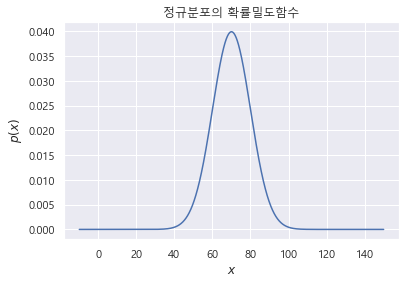

In [25]:
# 정규 분포 시각화 
plt.plot(s_x, s_pdf)
plt.title("정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

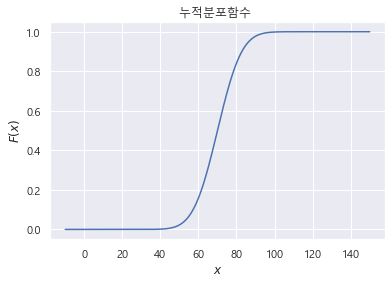

In [26]:
## 누적분포함수 
s_cdf = norm.cdf(s_x)

## 누적분포함수 계산 
# from scipy.special import erf
# s_cdf_cal = 0.5 * (1 + erf((s_x-mu)/(np.sqrt(2 * sigma**2))))

## 누적분포함수 시각화 
plt.plot(s_x, s_cdf)
plt.title("누적분포함수 ")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.show()

### 2) 표준정규분포  
- 표준화확률변수 𝑍에 의해 변환과정을 거쳐 평균이 0이고, 표준편차가 1로 정리된 정규분포
- stats.norm(loc = 0, scale = 1)  

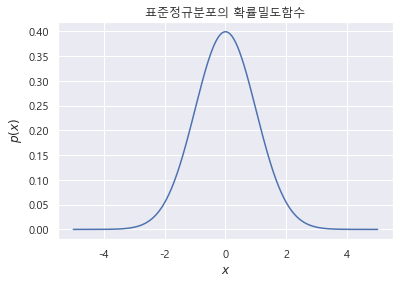

In [27]:
##기댓값이 0이고 표준 편차가 1인 정규분포 
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성(X축)
# -10 ~ 150 까지 2000개 생성 
sn_x = np.linspace(-5, 5, 1000)

# 확률 밀도함수 
sn_pdf = stan_norm.pdf(sn_x)

# 정규 분포 시각화 
plt.plot(sn_x, sn_pdf)
plt.title("표준정규분포의 확률밀도함수")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

### 3) 표준화   
- 정규분포를 평균이 0이고, 표준편차가 1인 표준정규분포로 정리하는 과정 
- stats.norm(loc = 0, scale = 1)  

In [28]:
## 랜덤 데이터 생성 
n_data = np.random.randint(1, 100, size = 1000)
n_data = np.sort(n_data)

n_data.shape

(1000,)

In [29]:
## n_data의 평균과 표준편차 계산 
n_mean = np.mean(n_data)
print('mean:', np.mean(n_data))

n_std = np.std(n_data)
print('standard deviation:', np.std(n_data))

mean: 49.012
standard deviation: 28.354785416222075


In [30]:
## 확률 밀도함수 
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

n_pdf = norm_n_data.pdf(n_data)

n_data.shape

(1000,)

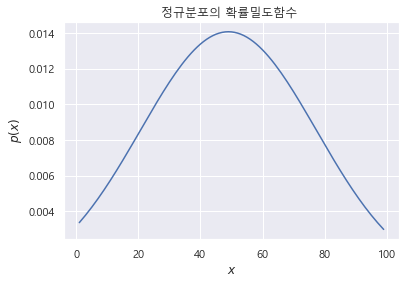

In [31]:
## 정규 분포 시각화 

plt.plot(n_data, n_pdf)
plt.title("정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

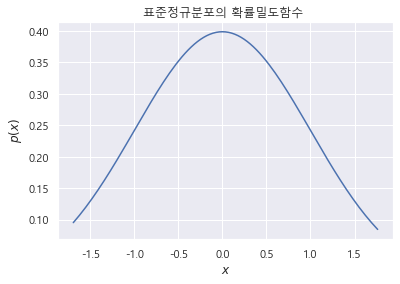

In [32]:
## 표준화 수행 
z_data = list(n_data)
z_data_list = [] 

for i in z_data:
    z = (i - n_mean) / n_std 
    z_data_list.append(z)
    
## 표준정규분포 확률 밀도함수 
norm_z_data = stats.norm(loc = 0, scale = 1)
z_pdf = norm_z_data.pdf(z_data_list)

# 표준정규분포 시각화 
plt.plot(z_data_list, z_pdf)
plt.title("표준정규분포의 확률밀도함수 ")
plt.xlabel("$x$")
plt.ylabel("$p(x)$")
plt.show()

## 4) 카이제곱분포 
- 모두 데이터가 흩어진 정도, 즉 치우침을 나타내는 분산의 특징을 이용해 한 집단의 (표본)분산을 추론하는 분포
- 범주형 변수인 명목척도나 서열척도 자료의 독립성 검정, 적합성 검정, 동질성 검정에 주로 활용 
- chisquare() : 카이제곱검정의 검정통계량과 유의확률을 계산, 적합도 검정
- chi2() : 카이 제곱분포

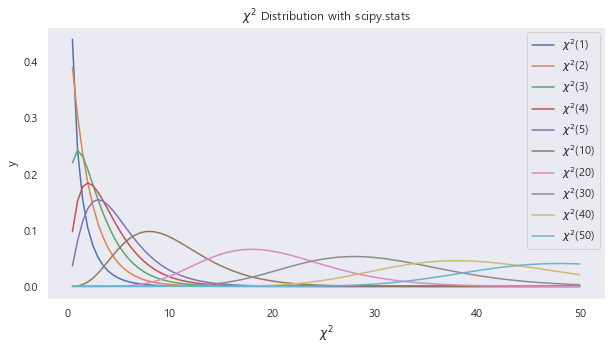

In [33]:
## 카이제곱 분포 표현 
from scipy.stats import chi2

## 라인스페이스 x축 설정 
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱 분포 시각화
plt.figure(figsize=(10, 5))          # 플롯 사이즈 지정
for dof in [1,2,3,4,5,10,20,30,40,50] :  
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
             label=r'$\chi^2$(' + str(dof) + ')')

plt.xlabel(r'$\chi^2$')              # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title(r'$\chi^2$ Distribution with scipy.stats')  
plt.legend()                         # 범례 표시
plt.show()                           # 플롯 

In [34]:
### 카이제곱 분포를 이용한 적합성 검정 
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매 
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수 
x_crosstab = pd.DataFrame([x_o, x_e], 
                          columns = ['서울','인천','대구'],
                          index = ['관찰도수', '기대도수'])

x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [35]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value가 0.0001725로 유의수준 0.05보다 작으므로
# 귀무가설을 기각하고, 
# 대립가설을 지지한다. 
# 즉, 관찰빈도와 기대빈도는 다르다.

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

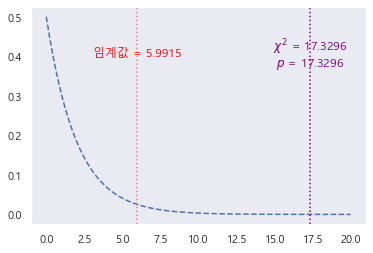

In [36]:
##  위 사례의 카이제곱분포 시각화
from scipy.stats import chi2 

dof = 2 # 자유도 --> 위 x_crosstab을 볼 때 2X3 chart. (2-1)*(3-1) = 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 : 5% 
x95_c = chi2(dof).ppf(.95)
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95%의 임계값 표시 
plt.axvline(x=x95_c, color='lightcoral', linestyle=':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
        horizontalalignment='center',color='red')

# 위에서 구한 카이분포통계값 = result[0]
plt.axvline(x=result[0], color='purple', linestyle=':')
plt.text(result[0], .4, r'$\chi^2$ = '+ str(round(result[0], 4)), va='bottom',
         horizontalalignment='center', color='purple')
plt.text(result[0], .4, r'$p$ = '+ str(round(result[0], 4)), va='top',
         horizontalalignment='center', color='purple')
plt.grid()
plt.show()